In [3]:
import pandas as pd

In [5]:
tel_data=pd.read_csv('3D Objects/Python_Files/telescope_data.csv')

In [7]:
tel_data.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
tel_data.columns=[cols.lower() for cols in tel_data.columns]

In [11]:
tel_data.head()

,unnamed: 0,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [13]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed: 0  19020 non-null  int64  
 1   flength     19020 non-null  float64
 2   fwidth      19020 non-null  float64
 3   fsize       19020 non-null  float64
 4   fconc       19020 non-null  float64
 5   fconc1      19020 non-null  float64
 6   fasym       19020 non-null  float64
 7   fm3long     19020 non-null  float64
 8   fm3trans    19020 non-null  float64
 9   falpha      19020 non-null  float64
 10  fdist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
tel_data.describe()

,unnamed: 0,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [17]:
import matplotlib.pyplot as plt

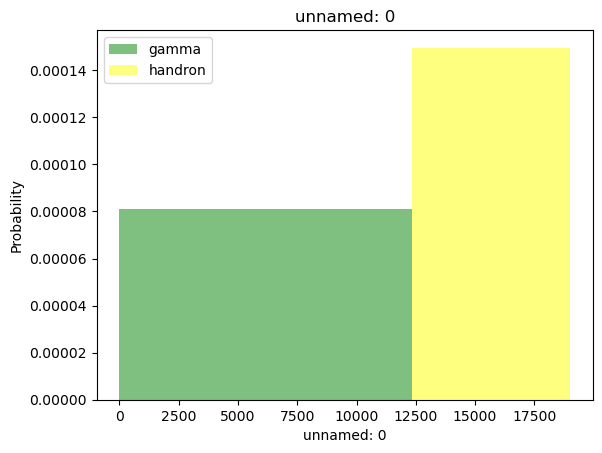

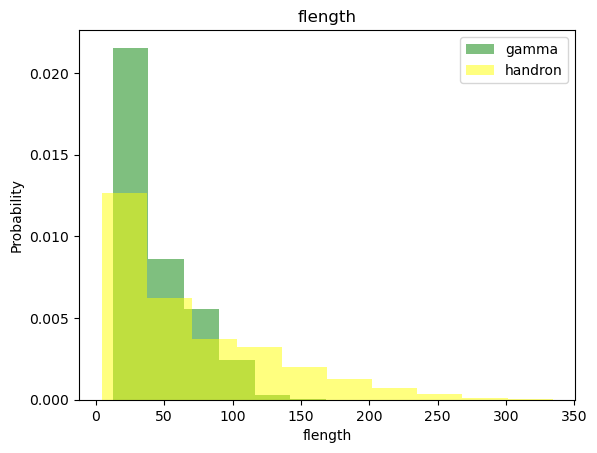

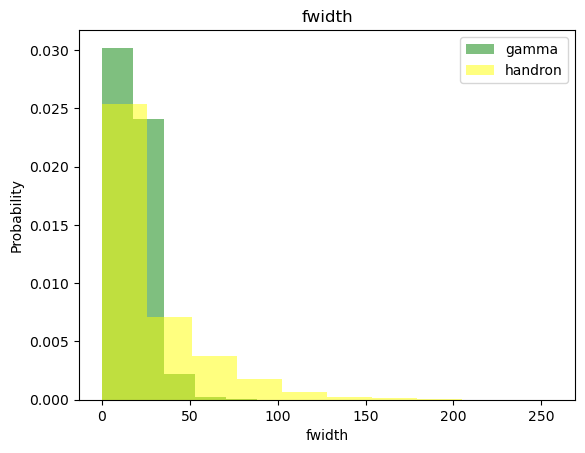

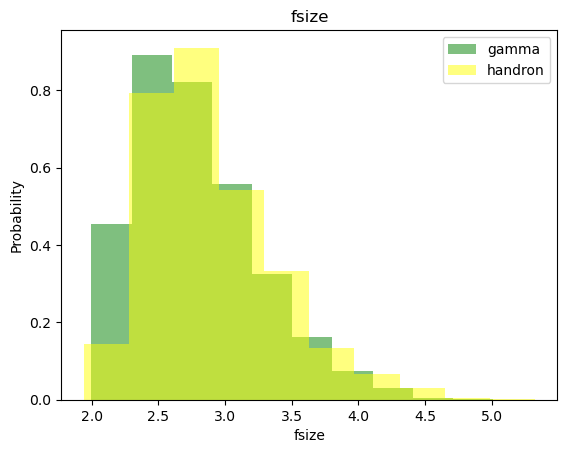

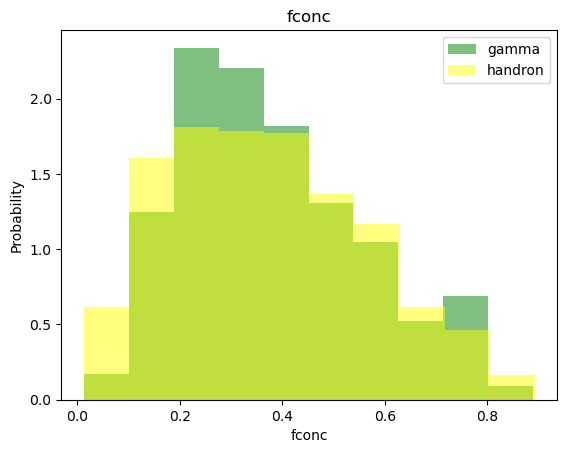

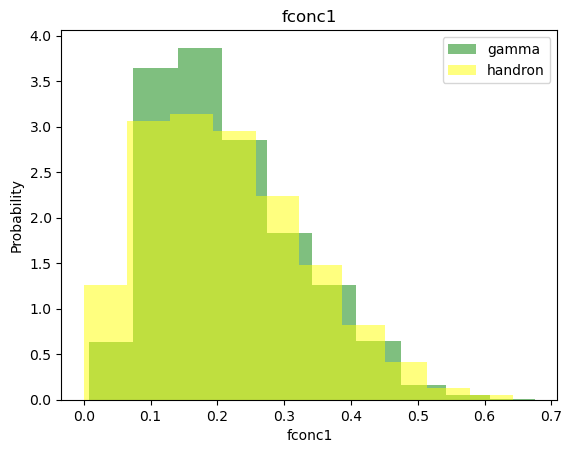

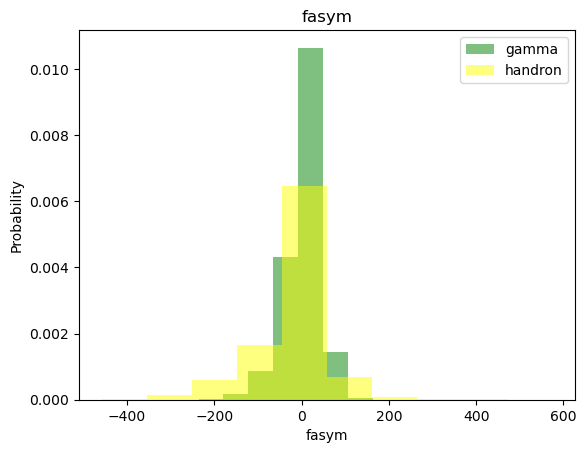

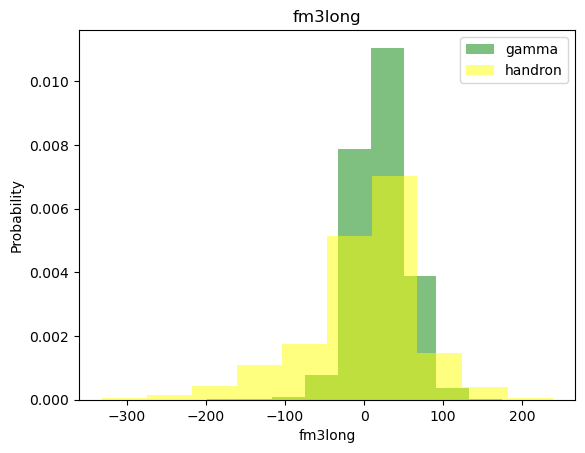

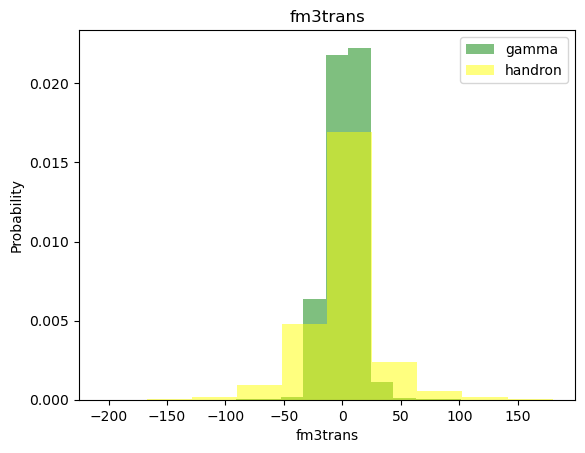

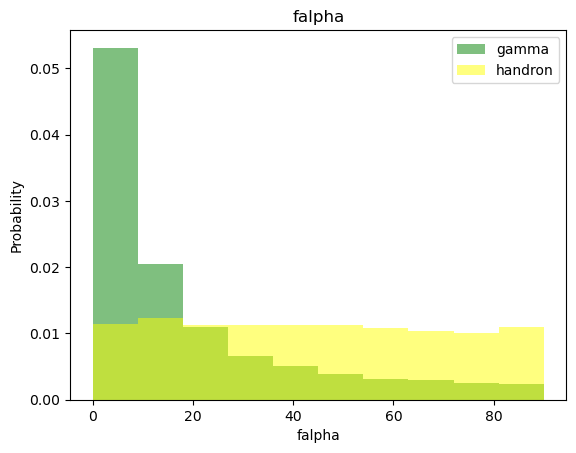

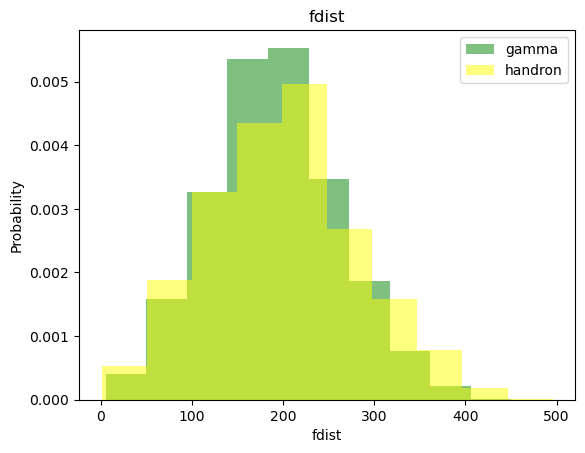

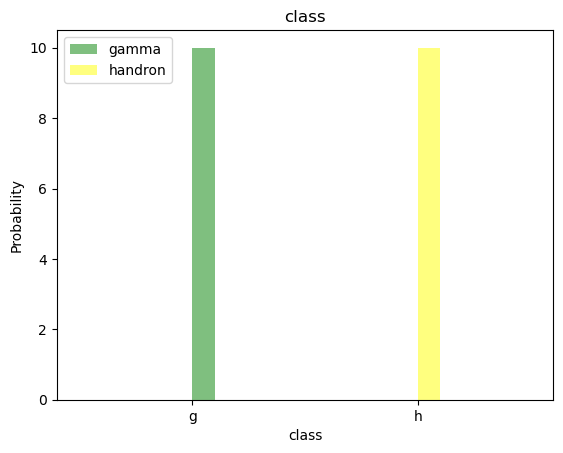

In [18]:
for label in (tel_data.columns):
    plt.hist(tel_data[tel_data['class']=='g'][label],color='green',label='gamma',alpha=0.5,density=True)
    plt.hist(tel_data[tel_data['class']=='h'][label],color='yellow',label='handron',alpha=0.5,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [65]:
from sklearn.model_selection import train_test_split
ds_train,ds_test=train_test_split(tel_data,test_size=0.2)
print(len(ds_train))
print(len(ds_test))

15216
3804


In [67]:
print(len(ds_train[ds_train['class']=='g']))
print(len(ds_train[ds_train['class']=='h']))

9822
5394


In [69]:
from imblearn.over_sampling import RandomOverSampler
r_sam=RandomOverSampler()
in_ds_train=ds_train.drop(columns=['class'])
out_ds_train=ds_train['class']

In [27]:
print(in_ds_train)

       unnamed: 0   flength    fwidth   fsize   fconc  fconc1     fasym  \
16434       16434   32.3397   11.5883  2.5982  0.3959  0.2216   42.6557   
2404         2404   22.8613   12.6787  2.5159  0.5122  0.3034   21.0613   
9564         9564   31.0833   19.6176  2.6289  0.3196  0.1774   24.7849   
2724         2724   62.9321   15.2389  3.1313  0.2683  0.1415   56.4425   
12823       12823   43.6872   20.4355  2.5720  0.4295  0.2482  -50.1245   
...           ...       ...       ...     ...     ...     ...       ...   
10605       10605   13.1980   10.8234  2.2109  0.7754  0.4154  -14.6154   
15883       15883  185.6516   40.9804  3.2267  0.1290  0.0927  -51.7551   
2304         2304   80.9257   38.4425  4.0026  0.1097  0.0581   85.3075   
17487       17487  243.1570  142.4580  3.6309  0.1310  0.0661 -195.6880   
381           381   22.2410    8.9672  2.2529  0.6536  0.3380    0.7829   

        fm3long  fm3trans   falpha     fdist  
16434   19.9213    6.4039  49.5985  143.0258  
2404 

In [71]:
print(out_ds_train)

7642     g
11687    g
17327    h
6156     g
15302    h
        ..
16301    h
3260     g
15827    h
15734    h
658      g
Name: class, Length: 15216, dtype: object


In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
in_ds_train=scaler.fit_transform(in_ds_train)
print(in_ds_train)

[[-0.34804991  0.09193215 -0.46549603 ...  0.46488018 -0.9940413
   0.94577435]
 [ 0.38845109 -0.75745731 -1.20682854 ... -0.42180921  0.38916892
   0.04908642]
 [ 1.41536473 -0.46610179 -0.61403717 ...  0.23148534  0.54273576
  -0.80507687]
 ...
 [ 1.1422494   0.66333726  0.66077706 ...  1.27266994  0.65630336
  -2.41352795]
 [ 1.12531625 -0.74036684 -0.82605665 ...  0.04661092  0.69617645
  -1.55463569]
 [-1.61967489 -0.53512151 -0.3706954  ...  0.29827166  1.09118003
  -2.26251477]]


In [75]:
in_ds_train,out_ds_train=r_sam.fit_resample(in_ds_train,out_ds_train)
print(len(out_ds_train))
print(sum(out_ds_train=='g'))
print(sum(out_ds_train=='h'))

19644
9822
9822


In [77]:
in_ds_test=ds_test.drop(columns=['class'])
out_ds_test=ds_test['class']
in_ds_test=scaler.fit_transform(in_ds_test)

In [87]:
print(len(in_ds_test))

3804


In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(in_ds_train,out_ds_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
out_pred=knn_model.predict(in_ds_train)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_info=accuracy_score(in_ds_test,out_pred)
accuracy_info

ValueError: Found input variables with inconsistent numbers of samples: [3804, 19644]

In [61]:
from sklearn.metrics import classification_report
print(classification_report(out_ds_test,out_pred))

ValueError: Found input variables with inconsistent numbers of samples: [3804, 19674]